In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
data = pd.read_csv('spg.csv')

# Data Preprocessing
features = data.drop(columns=['generated_power_kw'])
target = data['generated_power_kw']

# Scaling features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


**1. Linear Regression**

Linear Regression - RMSE: 507.53232182205124, R2: 0.7180084563489013


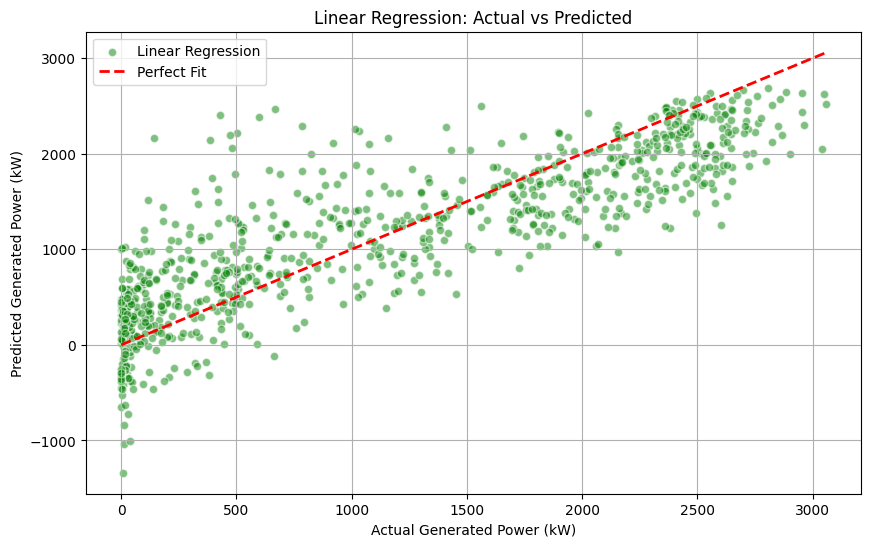

In [10]:
# Model Training - Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


# Predictions with Linear Regression
lr_pred = lr_model.predict(X_test)


# Evaluation - Linear Regression
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)
print(f"Linear Regression - RMSE: {lr_rmse}, R2: {lr_r2}")


# Predicted vs Actual - Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, color='green', alpha=0.5, label='Linear Regression', edgecolors='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Generated Power (kW)')
plt.ylabel('Predicted Generated Power (kW)')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

**2. Random Forest**

Random Forest - RMSE: 408.15322092726143, R2: 0.8176292724550602


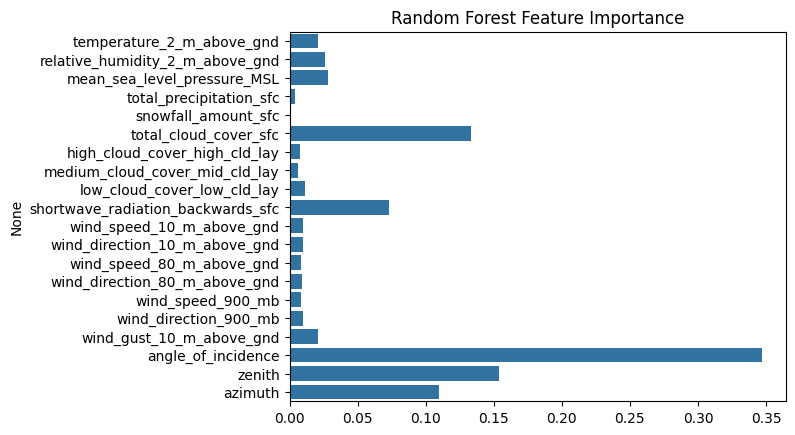

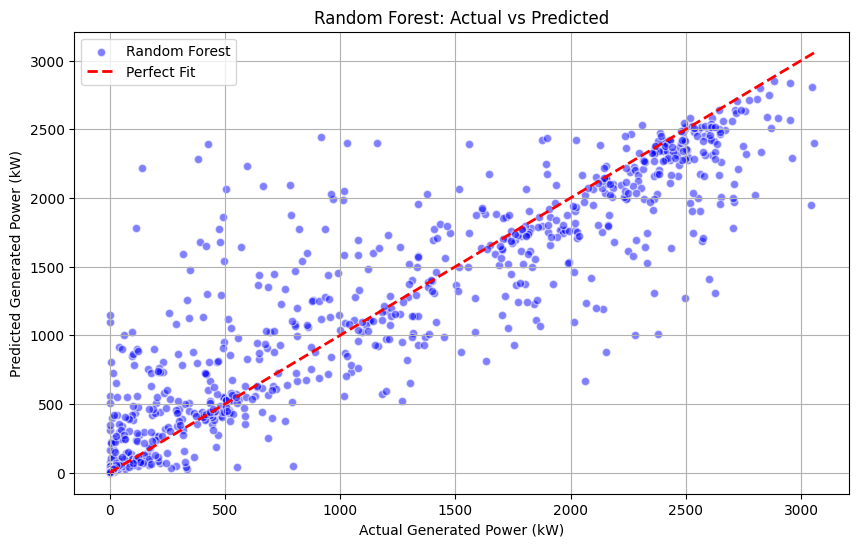

In [13]:
# Model Training - Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


# Predictions with Random Forest
rf_pred = rf_model.predict(X_test)


# Evaluation - Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest - RMSE: {rf_rmse}, R2: {rf_r2}")


# Feature Importance - Random Forest
rf_feature_importance = rf_model.feature_importances_
sns.barplot(x=rf_feature_importance, y=features.columns)
plt.title("Random Forest Feature Importance")
plt.show()

# Predicted vs Actual - Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, color='blue', alpha=0.5, label='Random Forest', edgecolors='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Generated Power (kW)')
plt.ylabel('Predicted Generated Power (kW)')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

**3. Batch Gradient Descent**

Iteration 0: Cost 1081622.8540327982
Iteration 100: Cost 241110.676459995
Iteration 200: Cost 147841.50126212332
Iteration 300: Cost 134740.1866256189
Iteration 400: Cost 132457.37472664847
Iteration 500: Cost 131769.3065751546
Iteration 600: Cost 131386.74368366812
Iteration 700: Cost 131105.6299009007
Iteration 800: Cost 130881.15030511821
Iteration 900: Cost 130696.58479073957


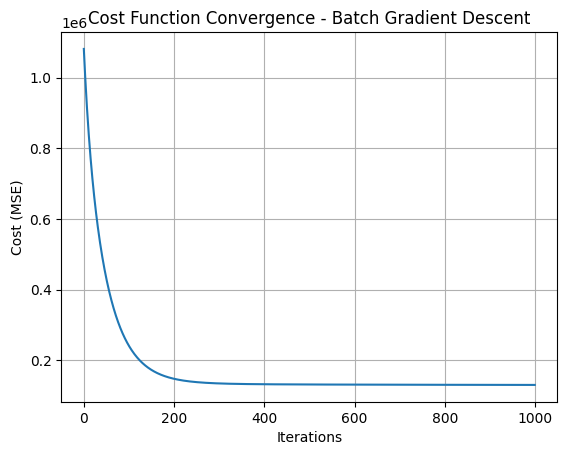

Batch Gradient Descent - RMSE: 506.6015136470937, R2: 0.7190418460669978


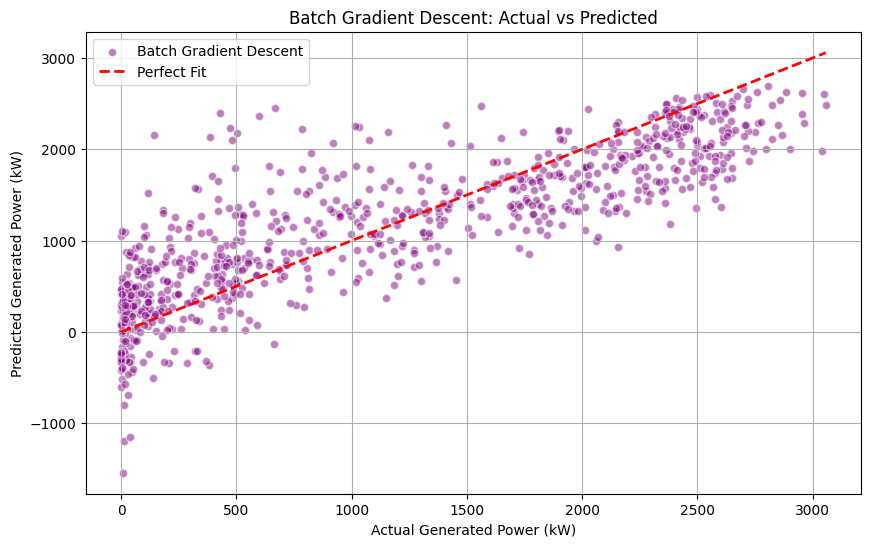

In [12]:
# Adding Batch Gradient Descent Implementation for Linear Regression

# Add bias term (column of ones) to the feature set
X_train_bgd = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_bgd = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Batch Gradient Descent Parameters
learning_rate = 0.01
iterations = 1000
m, n = X_train_bgd.shape
theta = np.zeros((n, 1))  # Initialize weights

# Convert y_train and y_test to 2D arrays for matrix operations
y_train_bgd = y_train.values.reshape(-1, 1)
y_test_bgd = y_test.values.reshape(-1, 1)

# Batch Gradient Descent Function
def batch_gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = []

    for i in range(iterations):
        # Prediction
        y_pred = X @ theta

        # Calculating the error
        error = y_pred - y

        # Gradient Calculation
        gradient = (1 / m) * (X.T @ error)

        # Updating the weights
        theta -= learning_rate * gradient

        # Calculating the cost (MSE)
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        cost_history.append(cost)

        # Print the cost every 100 iterations for monitoring
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return theta, cost_history

# Training the model using Batch Gradient Descent
theta_bgd, cost_history = batch_gradient_descent(X_train_bgd, y_train_bgd, theta, learning_rate, iterations)

# Plotting the cost function over iterations
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Convergence - Batch Gradient Descent')
plt.grid(True)
plt.show()

# Predictions on the test set using Batch Gradient Descent
y_pred_bgd = X_test_bgd @ theta_bgd

# Evaluation - Batch Gradient Descent
bgd_rmse = np.sqrt(mean_squared_error(y_test_bgd, y_pred_bgd))
bgd_r2 = r2_score(y_test_bgd, y_pred_bgd)
print(f"Batch Gradient Descent - RMSE: {bgd_rmse}, R2: {bgd_r2}")

# Predicted vs Actual - Batch Gradient Descent
plt.figure(figsize=(10, 6))
plt.scatter(y_test_bgd, y_pred_bgd, color='purple', alpha=0.5, label='Batch Gradient Descent', edgecolors='w')
plt.plot([y_test_bgd.min(), y_test_bgd.max()], [y_test_bgd.min(), y_test_bgd.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Generated Power (kW)')
plt.ylabel('Predicted Generated Power (kW)')
plt.title('Batch Gradient Descent: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()